In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
all_data=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
all_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [3]:
features = ['Close']
eval_data= pd.DataFrame(columns=features, data=all_data, index=all_data.index)
eval_data.head()

,Close
Date,
2000-01-03,170.00
2000-01-04,173.80
2000-01-05,166.95
2000-01-06,168.30
2000-01-07,168.35


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

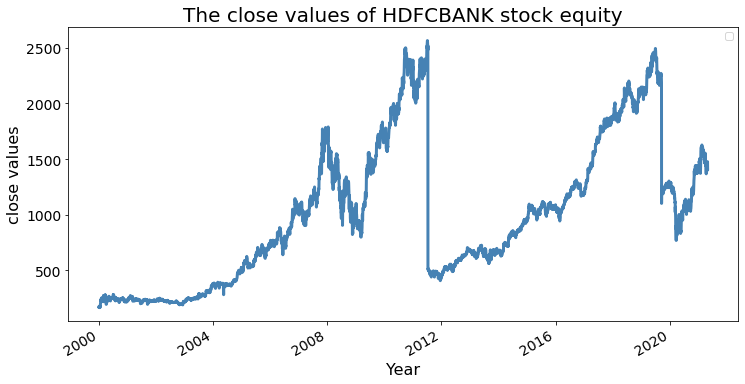

In [4]:
# line plot - the yearly accumulated rainfall in Barcelona
eval_data.plot(color='steelblue', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [5]:
eval_data['EMA_200'] = eval_data['Close'].ewm(span=200, adjust=False).mean()

In [6]:
eval_data.head()
eval_data.info()

,Close,EMA_200
Date,,
2000-01-03,170.00,170.000000
2000-01-04,173.80,170.037811
2000-01-05,166.95,170.007086
2000-01-06,168.30,169.990101
2000-01-07,168.35,169.973781


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    5306 non-null   float64
 1   EMA_200  5306 non-null   float64
dtypes: float64(2)
memory usage: 124.4 KB


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

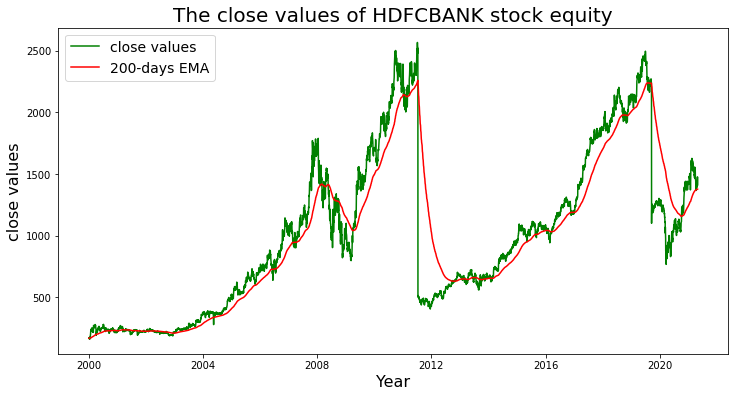

In [7]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['EMA_200'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '200-days EMA'], fontsize=14)
plt.show()

In [10]:
#!pip install pmdarima

In [11]:
import sys
print("python version",sys.version)
import numpy
print("numpy version",numpy.__version__)
import scipy
print("scipy version",scipy.__version__)
import sklearn
print("scikit -learn version",sklearn.__version__)
import pandas
print("pandas version",pandas.__version__)
import statsmodels
print("statsmodels version",statsmodels.__version__)
import pmdarima
print("pyramid version",pmdarima.__version__)
import pip
print("pip version",pip.__version__)

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
scipy version 1.4.1
scikit -learn version 1.0.2
pandas version 1.3.5
statsmodels version 0.13.2
pyramid version 1.8.5
pip version 21.1.3


In [12]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [13]:
features = ['EMA_200']
df1=eval_data[features]
df1.head()

,EMA_200
Date,
2000-01-03,170.000000
2000-01-04,170.037811
2000-01-05,170.007086
2000-01-06,169.990101
2000-01-07,169.973781


In [14]:
df1.index = pd.to_datetime(df1.index)
df2=df1.resample('1M').mean()
df2.head()

,EMA_200
Date,
2000-01-31,170.315987
2000-02-29,179.473813
2000-03-31,192.448224
2000-04-30,201.660391
2000-05-31,209.478499


In [15]:
df2.head()
df2.tail()
df2.shape
df2.info()
df2.describe()

,EMA_200
Date,
2000-01-31,170.315987
2000-02-29,179.473813
2000-03-31,192.448224
2000-04-30,201.660391
2000-05-31,209.478499


,EMA_200
Date,
2020-12-31,1222.258092
2021-01-31,1260.835125
2021-02-28,1306.858052
2021-03-31,1352.483946
2021-04-30,1373.254704


(256, 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2000-01-31 to 2021-04-30
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EMA_200  256 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


,EMA_200
count,256.000000
mean,987.411548
std,595.686866
min,170.315987
25%,491.250468
50%,956.997420
75%,1379.081764
max,2236.723862


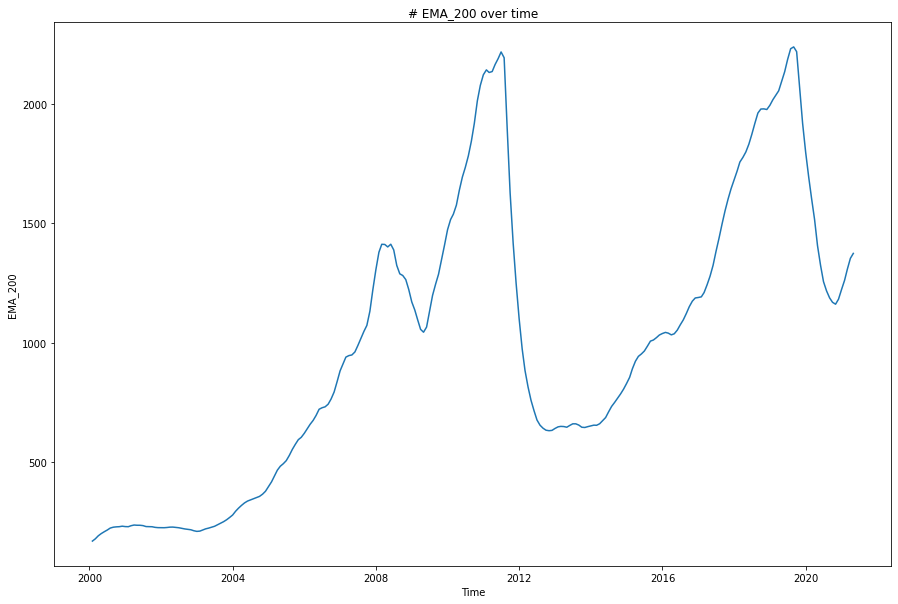

In [16]:
plt.figure(figsize=(15,10))
plt.plot(df2)
plt.xlabel('Time')
plt.ylabel('EMA_200')
plt.title("# EMA_200 over time")
plt.show;

In [17]:
decomposition=seasonal_decompose(df2,model='multiplicative',extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

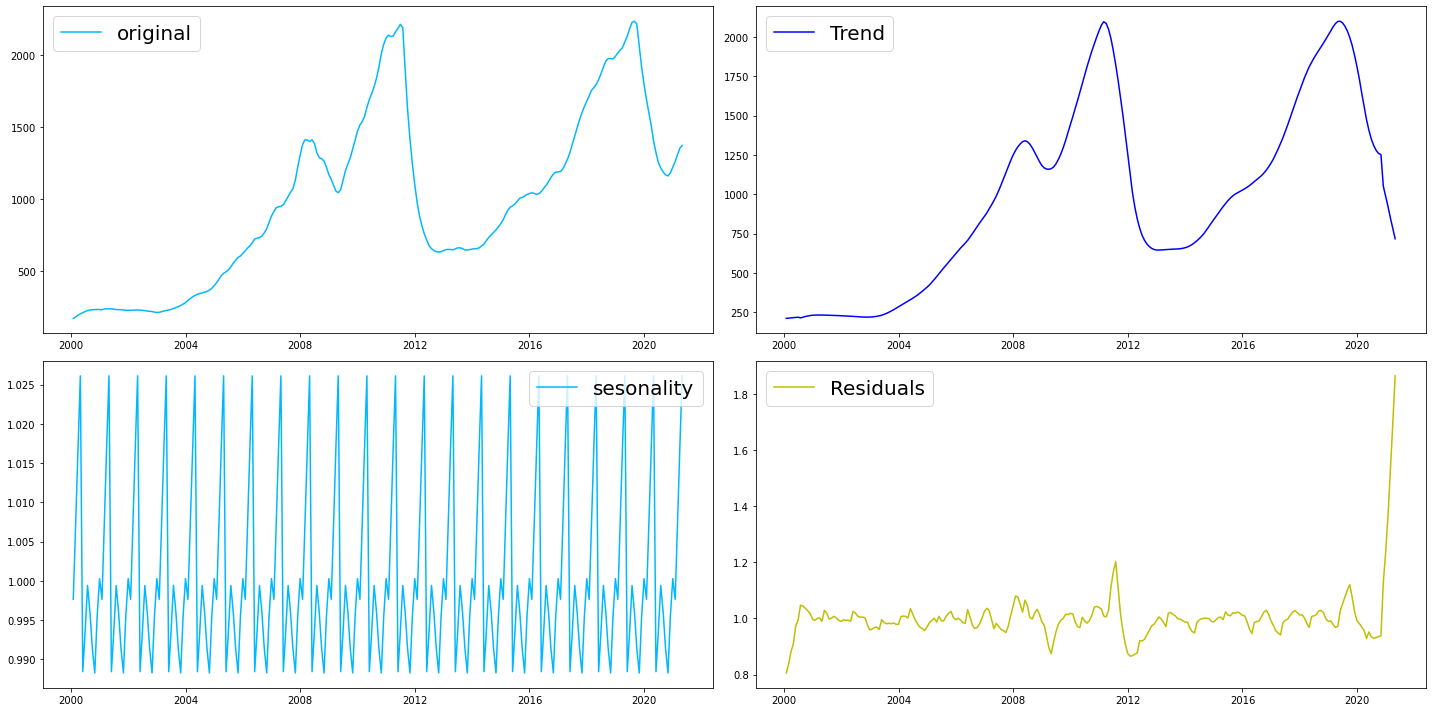

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

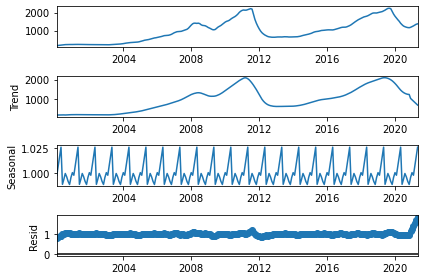

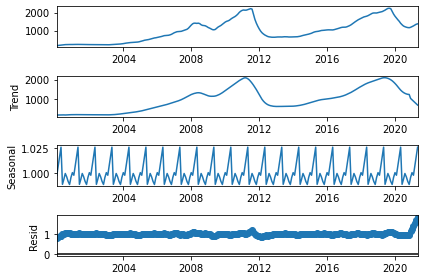

In [19]:
decomposition.plot()

In [20]:
decomposition=seasonal_decompose(df2,model='additive')

<Figure size 1440x720 with 0 Axes>

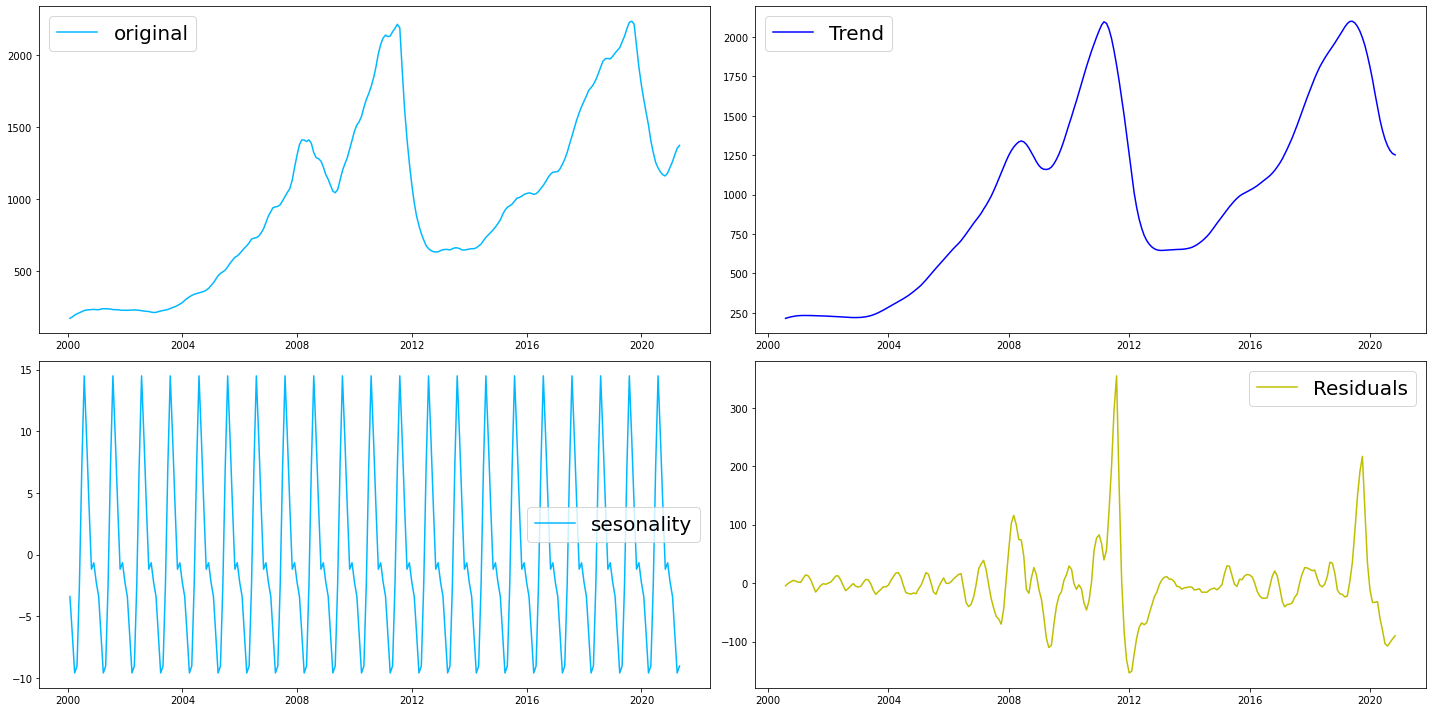

In [21]:
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

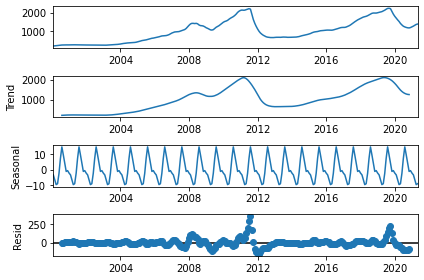

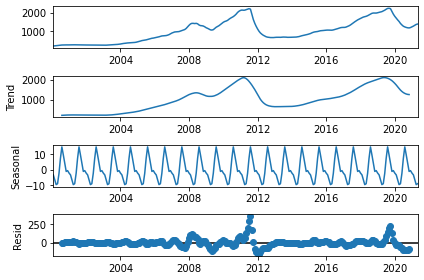

In [22]:
decomposition.plot()

In [23]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff (df2)

(0.18706049416624174, True)

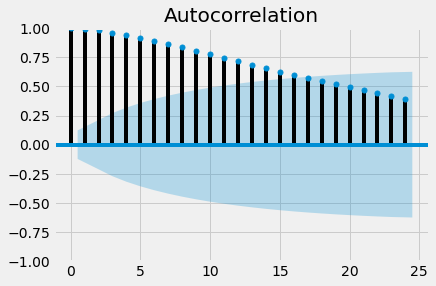

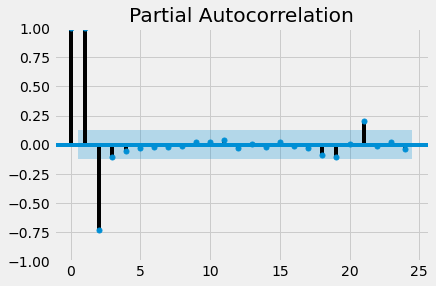

In [24]:
# Loading the packages
import pandas as pd
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df2, lags=24)
plt.show()

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(df2, lags=24)
plt.show()

In [25]:
train,test=df2[:240],df2[240:]
train.shape
test.shape

(240, 1)

(16, 1)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Train vs Train of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Train Data vs Test Data')

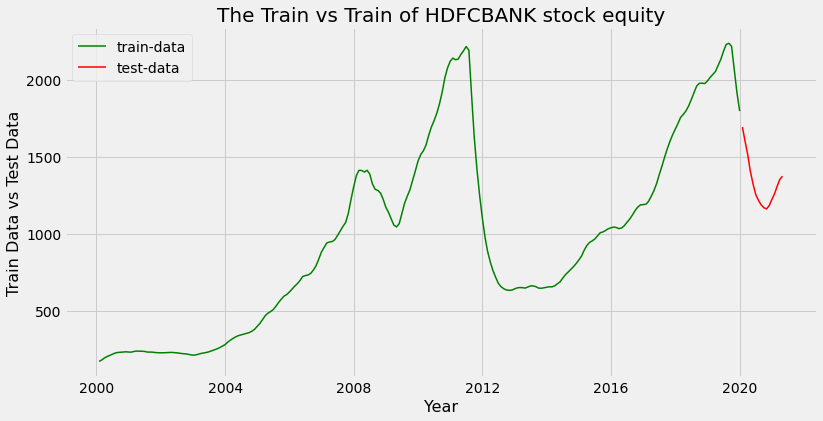

In [26]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The Train vs Train of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Train Data vs Test Data', fontsize=16)
plt.plot(train, color='green',linewidth=1.5)
plt.plot(test,color='red',linewidth=1.5)
plt.legend(labels =['train-data', 'test-data'], fontsize=14)
plt.show()

In [28]:
#fitting a stepwise model:
Arima_model=auto_arima(train,start_p=0,start_q=0,max_p=14,max_q=5,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2519.775, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2190.644, Time=1.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2309.124, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2522.790, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2189.204, Time=0.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2190.729, Time=0.99 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2191.791, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2168.034, Time=0.55 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2169.732, Time=1.13 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2169.764, Time=1.05 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2171.204, Time=1.86 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=2168.218, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2167.963, Time=0.65 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2169.570, Time=2.16 sec
 ARIMA(2,1,1)(0,0,1

In [29]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1079.155
Date:                Tue, 12 Jul 2022   AIC                           2164.309
Time:                        02:33:35   BIC                           2174.739
Sample:                             0   HQIC                          2168.512
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7973      0.059     13.509      0.000       0.682       0.913
ma.L1          0.3699      0.070      5.284      0.000       0.233       0.507
sigma2       485.7590     10.572     45.946      0.000     465.038     506.480
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             66976.31
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              16.48   Skew:                            -7.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        83.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction.columns=['Predicted_EMA_200']
prediction

,Predicted_EMA_200
Date,
2020-01-31,7.435450
2020-02-29,7.385016
2020-03-31,7.339832
2020-04-30,7.299964
2020-05-31,7.265657
2020-06-30,7.235893
2020-07-31,7.210407
2020-08-31,7.189044
2020-09-30,7.169797


<Figure size 1080x720 with 0 Axes>

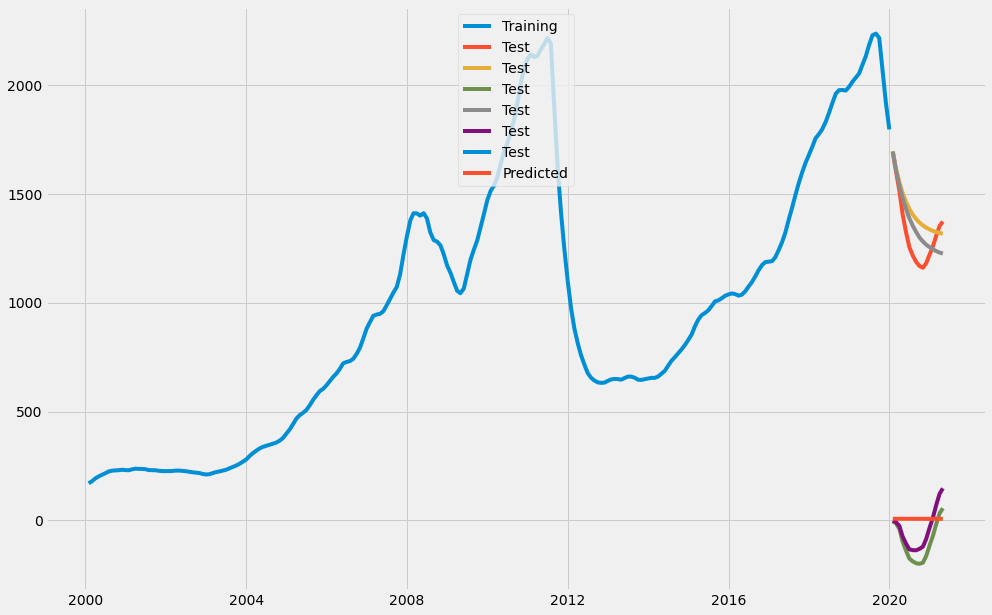

In [60]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [61]:
test['Predicted_EMA_200']=prediction
test['Error']=test['EMA_200']-test['Predicted_EMA_200']
test

,EMA_200,Predicted_EMA_200,Error,log_prediction,Error_log,train_log
Date,,,,,,
2020-01-31,1692.654631,7.435450,1685.219181,1695.020582,-2.365951,NaN
2020-02-29,1604.129787,7.385016,1596.744771,1611.654058,-7.524271,NaN
2020-03-31,1514.769284,7.339832,1507.429453,1540.452595,-25.683311,NaN
2020-04-30,1405.440348,7.299964,1398.140384,1480.246475,-74.806127,NaN
2020-05-31,1323.200408,7.265657,1315.934752,1430.324475,-107.124067,NaN
2020-06-30,1255.131579,7.235893,1247.895686,1388.379845,-133.248266,NaN
2020-07-31,1216.610446,7.210407,1209.400039,1353.443056,-136.832611,NaN
2020-08-31,1187.474338,7.189044,1180.285293,1324.836663,-137.362325,NaN
2020-09-30,1168.838360,7.169797,1161.668562,1299.581304,-130.742944,NaN


**STEP6-EVALUATE MODEL PERFORMANCE for EMA_200ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [62]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.EMA_200,test.Predicted_EMA_200),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


1319.446

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [63]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.EMA_200,test.Predicted_EMA_200),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


1764725.731

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [64]:
import math
math.sqrt(mse)

1328.4297990484856

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [65]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.EMA_200,test.Predicted_EMA_200),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


1276.722

**Mean Absolute Percentage Error FOR TEST DATA**

In [66]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.EMA_200-test.Predicted_EMA_200)/test.EMA_200))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


99.45

,EMA_200
Date,
2000-01-31,5.137655
2000-02-29,5.190029
2000-03-31,5.259827
2000-04-30,5.306585
2000-05-31,5.344621


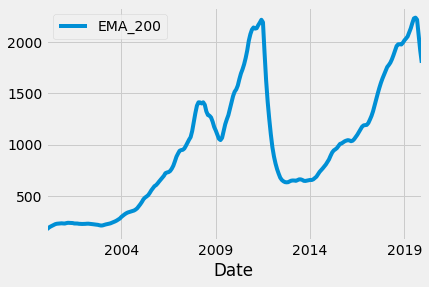

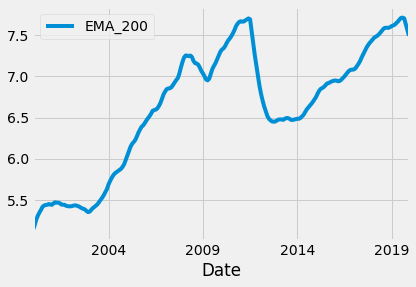

In [67]:
train_log=np.log(train)
train_log.head()
train.plot()
train_log.plot()
plt.show()

In [68]:
#fitting a stepwise model:
Arima_model=auto_arima(train_log,start_p=0,start_q=0,max_p=14,max_q=5,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-920.746, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1338.908, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1159.157, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-904.463, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-1339.049, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1338.422, Time=0.42 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-1339.440, Time=0.78 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-1340.989, Time=2.54 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-1342.828, Time=1.75 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=-1340.877, Time=3.90 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=-1338.873, Time=4.58 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-918.432, Time=1.18 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-1363.876, Time=2.83 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-1362.338, Time=0.81 sec
 ARIMA(2

In [69]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood                 689.285
Date:                             Tue, 12 Jul 2022   AIC                          -1368.570
Time:                                     02:55:27   BIC                          -1351.187
Sample:                                          0   HQIC                         -1361.565
                                             - 240                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8760      0.041     21.219      0.000       0.795       0.957
ma.L1          0.3761      0.068      5.572      0.000       0.244       0.508
ar.S.L12      -0.0593      0.093     -0.640      0.522      -0.241       0.122
ar.S.L24       0.1125      0.103      1.095      0.273      -0.089       0.314
sigma2         0.0002   6.26e-06     28.913      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10124.58
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -3.68
Prob(H) (two-sided):                  0.64   Kurtosis:                        34.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
prediction_log=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction_log.columns=['Predicted_EMA_200']

In [71]:
prediction_log

,Predicted_EMA_200
Date,
2020-01-31,7.435450
2020-02-29,7.385016
2020-03-31,7.339832
2020-04-30,7.299964
2020-05-31,7.265657
2020-06-30,7.235893
2020-07-31,7.210407
2020-08-31,7.189044
2020-09-30,7.169797


In [72]:
prediction1=np.exp(prediction_log)
prediction1

,Predicted_EMA_200
Date,
2020-01-31,1695.020582
2020-02-29,1611.654058
2020-03-31,1540.452595
2020-04-30,1480.246475
2020-05-31,1430.324475
2020-06-30,1388.379845
2020-07-31,1353.443056
2020-08-31,1324.836663
2020-09-30,1299.581304


In [85]:
test['log_prediction']=prediction1
test['Error_log']=test['EMA_200']-test['log_prediction']
#test=test.drop(['train_log'],axis=1)
test.head()

,EMA_200,Predicted_EMA_200,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1692.654631,7.435450,1685.219181,1695.020582,-2.365951
2020-02-29,1604.129787,7.385016,1596.744771,1611.654058,-7.524271
2020-03-31,1514.769284,7.339832,1507.429453,1540.452595,-25.683311
2020-04-30,1405.440348,7.299964,1398.140384,1480.246475,-74.806127
2020-05-31,1323.200408,7.265657,1315.934752,1430.324475,-107.124067


**STEP6-EVALUATE MODEL PERFORMANCE for EMA_200ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [74]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.EMA_200,prediction1),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


84.212

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [75]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.EMA_200,prediction1),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


9662.994

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [76]:
import math
math.sqrt(mse)

98.3005289914556

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [77]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.EMA_200,prediction1),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


96.062

**Mean Absolute Percentage Error FOR TEST DATA**

In [78]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.EMA_200-prediction1)/test.EMA_200))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


2020-01-31 00:00:00   NaN
2020-02-29 00:00:00   NaN
2020-03-31 00:00:00   NaN
2020-04-30 00:00:00   NaN
2020-05-31 00:00:00   NaN
2020-06-30 00:00:00   NaN
2020-07-31 00:00:00   NaN
2020-08-31 00:00:00   NaN
2020-09-30 00:00:00   NaN
2020-10-31 00:00:00   NaN
2020-11-30 00:00:00   NaN
2020-12-31 00:00:00   NaN
2021-01-31 00:00:00   NaN
2021-02-28 00:00:00   NaN
2021-03-31 00:00:00   NaN
2021-04-30 00:00:00   NaN
Predicted_EMA_200     NaN
dtype: float64

In [86]:
test.head()

,EMA_200,Predicted_EMA_200,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1692.654631,7.435450,1685.219181,1695.020582,-2.365951
2020-02-29,1604.129787,7.385016,1596.744771,1611.654058,-7.524271
2020-03-31,1514.769284,7.339832,1507.429453,1540.452595,-25.683311
2020-04-30,1405.440348,7.299964,1398.140384,1480.246475,-74.806127
2020-05-31,1323.200408,7.265657,1315.934752,1430.324475,-107.124067


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

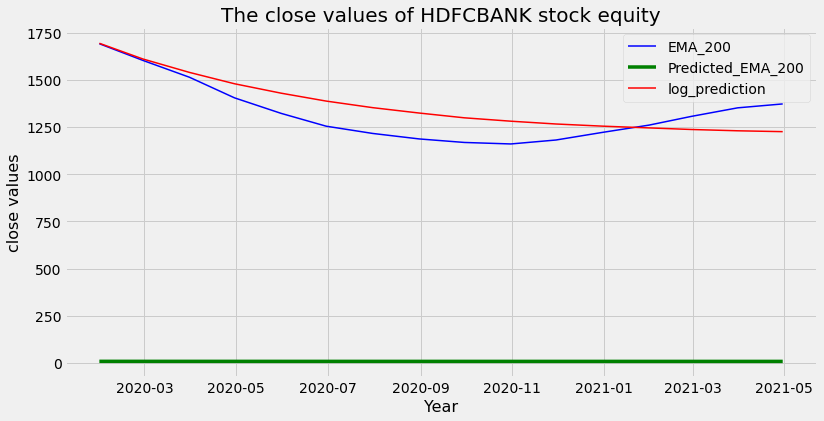

In [89]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(test.index,test['EMA_200'],color='b',linewidth=1.5)
plt.plot(test.index,test['Predicted_EMA_200'],color='g',linewidth=3.5)
plt.plot(test.index,test['log_prediction'],color='r',linewidth=1.5)
plt.legend(labels =['EMA_200', 'Predicted_EMA_200','log_prediction'], fontsize=14)
plt.show()

In [90]:
!jupyter nbconvert EMA_200ARIMA_StockMarketPrediction.ipynb

[NbConvertApp] Converting notebook EMA_200ARIMA_StockMarketPrediction.ipynb to html
[NbConvertApp] Writing 1284242 bytes to EMA_200ARIMA_StockMarketPrediction.html
